# Adelanto de algunos códigos útiles 💯👀

---

Importamos librerías necesarias.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Para mostrar los ejemplos continuaremos trabajando con el `Breast Cancer` dataset.

In [2]:
data_dict = datasets.load_breast_cancer()
breast_cancer = pd.DataFrame(data=data_dict.data,
                    columns=data_dict.feature_names)

breast_cancer['target'] = data_dict.target

breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Separemos el conjunto de datos en variables de entrenamiento y variable target.

In [3]:
X = breast_cancer.drop('target', axis = 1)
y = breast_cancer['target']

Separemos en conjuntos de entrenamiento y prueba. 

El conjunto de prueba (test) será utilizado para elegir entre modelos de distinta procedencia, en nuestro caso el mejor modelo SVM y el mejor modelo KNN. Existe otro conjunto llamado conjunto de validación que se utiliza para elegir entre modelos de la misma familia, pero que tienen distintos hiperparámetros, este conjunto es el que se crea al realizar Cross-Validation.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Algunos modelos de clasificación reciben hiperparámetros, como por ejemplo la cantidad de vecinos cercanos en el modelo KNN. Para buscar los mejores hiperparámetros podemos hacer una búsqueda en una grilla usando la función [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), la cual además nos permite usar Cross-Validation internamente, eligiendo el mejor conjunto de hiperparámetros según una métrica dada.

## Support Vector Machine SVM

In [5]:
model_base_svm = SVC()
param_grid_svm = {
    # Las keys de este diccionario deben corresponder al nombre exacto de los parámetros que recibe el modelo base.
    'C' : [0.1, 1, 10],
    'kernel' : ['linear', 'rbf', 'poly'],
    'degree' : [2, 3],
}
best_svm = GridSearchCV(model_base_svm,
                        param_grid_svm,
                        cv = 5, # cantidad de divisiones al train set
                        scoring = 'f1' # 'accuracy', 'precision', 'recall', 'f1'
                        )
best_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1')

Visualicemos los mejores hiperparámetros encontrados.

In [6]:
best_svm.best_params_

{'C': 1, 'degree': 2, 'kernel': 'linear'}

Además, podemos visualizar toda la información del entrenamiento de la siguiente forma:

In [7]:
results_svm = pd.DataFrame(best_svm.cv_results_)
results_svm.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.196674,0.095998,0.007155,0.004842,0.1,2,linear,"{'C': 0.1, 'degree': 2, 'kernel': 'linear'}",0.947368,0.965517,0.982456,0.966102,0.931034,0.958496,0.017659,5
1,0.006350,0.003183,0.006427,0.005888,0.1,2,rbf,"{'C': 0.1, 'degree': 2, 'kernel': 'rbf'}",0.913386,0.888889,0.957265,0.883721,0.896000,0.907852,0.026663,15
2,0.008102,0.000478,0.001593,0.003187,0.1,2,poly,"{'C': 0.1, 'degree': 2, 'kernel': 'poly'}",0.906250,0.888889,0.957265,0.883721,0.896000,0.906425,0.026519,17
3,0.163130,0.041881,0.007926,0.004907,0.1,3,linear,"{'C': 0.1, 'degree': 3, 'kernel': 'linear'}",0.947368,0.965517,0.982456,0.966102,0.931034,0.958496,0.017659,5
4,0.009374,0.003150,0.006817,0.005198,0.1,3,rbf,"{'C': 0.1, 'degree': 3, 'kernel': 'rbf'}",0.913386,0.888889,0.957265,0.883721,0.896000,0.907852,0.026663,15


Debemos seleccionar una métrica para comparar los mejores modelos de cada tipo usando el conjunto de prueba.

En nuestro caso, elegiremos el F1-score, ya que es la media ármonica de la Precisión y el Recall.

In [8]:
y_pred_svm = best_svm.predict(X_test)

In [9]:
f1_score_svm = f1_score(y_test, y_pred_svm)
f1_score_svm

0.9655172413793103

Además, podemos imprimir indicadores de interés para evaluar el modelo:

In [10]:
print(classification_report(y_test, y_pred_svm, target_names=data_dict.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Y su matriz de confusión:

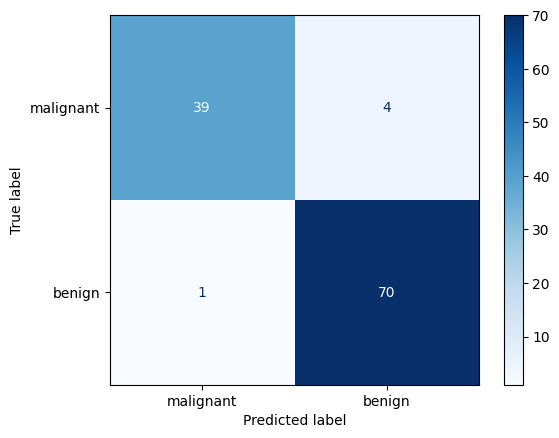

In [11]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_svm,
    cmap= 'Blues',
    display_labels = data_dict.target_names # nombres de etiquetas
);

También podemos visualizar la curva ROC, junto al AUC.

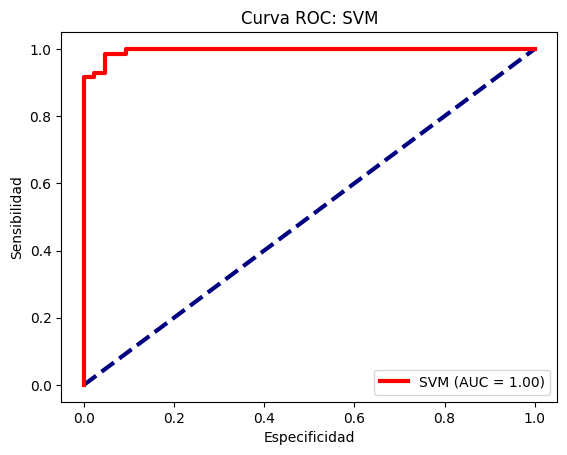

In [12]:
RocCurveDisplay.from_estimator(
    best_svm,
    X_test,
    y_test,
    name = 'SVM',
    lw=3, color='red', zorder=2
)
plt.plot([0,1], [0,1], c='navy', ls='--', lw=3, zorder=1)
plt.xlabel('Especificidad'); plt.ylabel('Sensibilidad')
plt.title('Curva ROC: SVM');

## K-Nearest Neighbors

In [13]:
model_base_knn = KNeighborsClassifier(algorithm='ball_tree')
param_grid_knn = { 
    # Las keys de este diccionario deben corresponder al nombre exacto de los parámetros que recibe el modelo base.
    'n_neighbors' : [1, 3, 5, 10, 15]
}
best_knn = GridSearchCV(model_base_knn,
                        param_grid_knn,
                        cv = 5, # cantidad de divisiones al train set
                        scoring = 'f1' # 'accuracy', 'precision', 'recall', 'f1'
                        )
best_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(algorithm='ball_tree'),
             param_grid={'n_neighbors': [1, 3, 5, 10, 15]}, scoring='f1')

Visualicemos los mejores hiperparámetros encontrados.

In [14]:
best_knn.best_params_

{'n_neighbors': 10}

Además, podemos visualizar toda la información del entrenamiento de la siguiente forma:

In [15]:
results_knn = pd.DataFrame(best_knn.cv_results_)
results_knn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007408,0.001868,0.013858,0.003948,1,{'n_neighbors': 1},0.955752,0.925620,0.946429,0.913793,0.924370,0.933193,0.015464,5
1,0.003125,0.006250,0.006256,0.007663,3,{'n_neighbors': 3},0.956522,0.907563,0.982456,0.924370,0.925620,0.939306,0.026744,3
2,0.000000,0.000000,0.012581,0.006294,5,{'n_neighbors': 5},0.946429,0.924370,0.964286,0.924370,0.941176,0.940126,0.014974,2
3,0.000000,0.000000,0.009378,0.007657,10,{'n_neighbors': 10},0.991304,0.916667,0.955752,0.915254,0.932203,0.942236,0.028541,1
4,0.006688,0.007357,0.006007,0.004984,15,{'n_neighbors': 15},0.982759,0.909091,0.955752,0.915254,0.909091,0.934389,0.029806,4


Dado que elegimos la F1-score, la calcularemos en las predicciones de este modelo.

In [16]:
y_pred_knn = best_knn.predict(X_test)

In [17]:
f1_score_knn = f1_score(y_test, y_pred_knn)
f1_score_knn

0.979020979020979

Además, podemos imprimir indicadores de interés para evaluar el modelo:

In [18]:
print(classification_report(y_test, y_pred_knn, target_names=data_dict.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Y su matriz de confusión:

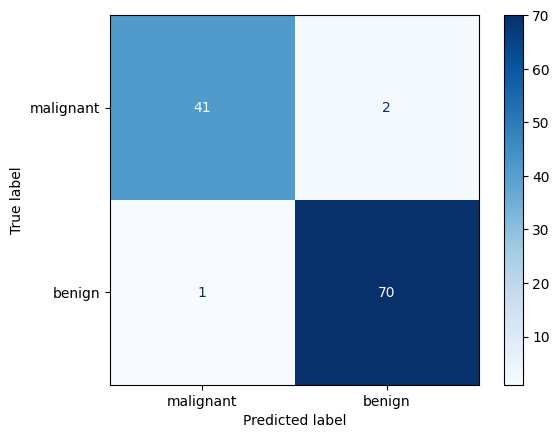

In [19]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_knn,
    cmap= 'Blues',
    display_labels = data_dict.target_names # nombres de etiquetas
);

También podemos visualizar la curva ROC, junto al AUC.

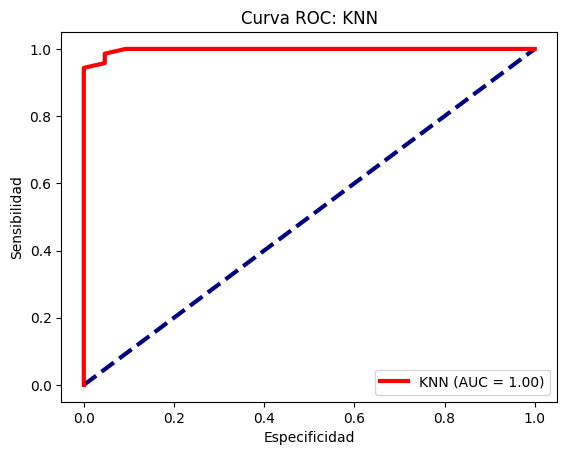

In [20]:
RocCurveDisplay.from_estimator(
    best_knn,
    X_test,
    y_test,
    name = 'KNN',
    lw=3, color='red', zorder=2
)
plt.plot([0,1], [0,1], c='navy', ls='--', lw=3, zorder=1)
plt.xlabel('Especificidad'); plt.ylabel('Sensibilidad')
plt.title('Curva ROC: KNN');

## Selección de modelo

In [25]:
mejor_modelo = 'KNN' if f1_score_knn > f1_score_svm else 'SVM'
print(f'El mejor modelo según el F1-score es: {mejor_modelo},')
print(f'con los siguientes parámetros: {best_knn.best_params_ if f1_score_knn > f1_score_svm else best_svm.best_params_}')

El mejor modelo según el F1-score es: KNN,
con los siguientes parámetros: {'n_neighbors': 10}
